#**DESAFIO - OTIMIZAÇÃO DE TRELIÇA**
ALUNO: KAIQUE OLEGAR AMARO DOS SANTOS



# Cálculo do Deslocamento em uma treliça






In [1]:
def ForcasNormais(L, F):
    rAx = 0
    rEy = (F[1]*L[0] + F[2]*(L[0]+L[1]) + F[3]*(L[0]+L[1]+L[2]) + F[4]*(L[0]+L[1]+L[2]+L[3])) / (L[0] + L[1] + L[2] + L[3])
    rAy = F[0] + F[1] + F[2] + F[3] + F[4] - rEy

    FN = [0 for i in range(13)]

    FN[4] = (F[0] - rAy) / (L[5] / L[4])
    FN[0] = -rAx - FN[4]*(L[0] / L[4])
    FN[1] = FN[0]
    FN[5] = 0

    if L[5] < L[7]:
        FN[6] = (-F[1] + FN[4]*(((L[0]*(L[7]-L[5]))/(L[4]*L[1]))-(L[5]/L[4]))) / (L[7] / L[6])
        FN[11] = (FN[4]*L[0]/L[4] - FN[6]*L[1]/L[6]) / (L[1]/L[11])
    elif L[5] == L[7]:
        FN[6] = (-F[1] - FN[4]*L[5]/L[4]) / (L[5]/L[6])
        FN[11] = FN[4]*L[0]/L[4] - FN[6]*L[1]/L[6]
    else:
        FN[6] = (F[1] + FN[4]*(((L[0]*(L[5]-L[7]))/(L[4]*L[1]))+(L[5]/L[4]))) / (-L[7] / L[6])
        FN[11] = (FN[4]*L[0]/L[4] - FN[6]*L[1]/L[6]) / (L[1]/L[11])


    FN[10] = (F[4] - rEy) / (L[9] / L[10])
    FN[3] = -(FN[10]*L[3]/L[10])
    FN[2] = FN[3]
    FN[9] = 0

    if L[7] > L[9]:
        FN[8] = (-F[3] + FN[10]*(((L[3]*(L[7]-L[9]))/(L[10]*L[2]))-(L[9]/L[10]))) / (L[7] / L[8])
        FN[12] = (FN[10]*L[3]/L[10] - FN[8]*L[2]/L[8]) / (L[2]/L[12])
    elif L[7] == L[9]:
        FN[8] = (-F[3] - FN[10]*L[9]/L[10]) / (L[9]/L[8])
        FN[12] = FN[10]*L[3]/L[10] - FN[8]*L[2]/L[8]
    else:
        FN[8] = (F[3] + FN[10]*(((L[3]*(L[9]-L[7]))/(L[10]*L[2]))+(L[9]/L[10]))) / (-L[7] / L[8])
        FN[12] = (FN[10]*L[3]/L[10] - FN[8]*L[2]/L[8]) / (L[2]/L[12])

    FN[7] = -FN[8]*L[9]/L[8] - FN[6]*L[5]/L[6]

    return FN

# Cálculo das forças virtuais

Para encontrar as equações das forças virtuais de cada barra, foram utilizados os mesmos procedimentos das forças axiais, porém, desconsiderando as forças de carregamento, e atribuindo uma carga virtual unitária ao ponto que se deseja encontrar o deslocamento

In [2]:
def ForcasVirtuais(L):
    F = 1

    rAx = 0
    rEy = F*(L[0] + L[1]) / (L[0]+L[1]+L[2]+L[3])
    rAy = F - rEy

    FV = [0 for i in range(13)]

    FV[4] = (- rAy) / (L[5] / L[4])
    FV[0] = -rAx - FV[4]*(L[0] / L[4])
    FV[1] = FV[0]
    FV[5] = 0

    if L[5] < L[7]:
        FV[6] = (FV[4]*(((L[0]*(L[7]-L[5]))/(L[4]*L[1]))-(L[5]/L[4]))) / (L[7] / L[6])
        FV[11] = (FV[4]*L[0]/L[4] - FV[6]*L[1]/L[6]) / (L[1]/L[11])
    elif L[5] == L[7]:
        FV[6] = (- FV[4]*L[5]/L[4]) / (L[5]/L[6])
        FV[11] = FV[4]*L[0]/L[4] - FV[6]*L[1]/L[6]
    else:
        FV[6] = (FV[4]*(((L[0]*(L[5]-L[7]))/(L[4]*L[1]))+(L[5]/L[4]))) / (-L[7] / L[6])
        FV[11] = (FV[4]*L[0]/L[4] - FV[6]*L[1]/L[6]) / (L[1]/L[11])


    FV[10] = (- rEy) / (L[9] / L[10])
    FV[3] = -(FV[10]*L[3]/L[10])
    FV[2] = FV[3]
    FV[9] = 0

    if L[7] > L[9]:
        FV[8] = (FV[10]*(((L[3]*(L[7]-L[9]))/(L[10]*L[2]))-(L[9]/L[10]))) / (L[7] / L[8])
        FV[12] = (FV[10]*L[3]/L[10] - FV[8]*L[2]/L[8]) / (L[2]/L[12])
    elif L[7] == L[9]:
        FV[8] = (- FV[10]*L[9]/L[10]) / (L[9]/L[8])
        FV[12] = FV[10]*L[3]/L[10] - FV[8]*L[2]/L[8]
    else:
        FV[8] = (FV[10]*(((L[3]*(L[9]-L[7]))/(L[10]*L[2]))+(L[9]/L[10]))) / (-L[7] / L[8])
        FV[12] = (FV[10]*L[3]/L[10] - FV[8]*L[2]/L[8]) / (L[2]/L[12])

    FV[7] = F - FV[8]*L[9]/L[8] - FV[6]*L[5]/L[6]

    return FV

# Função para calcular os comprimentos

In [3]:
def comprimentos(L):
    from math import sqrt
    L = [L[0], L[1], L[2], L[3], 0, L[4], 0, L[5], 0, L[6], 0, 0, 0]
    L[4] = sqrt(L[5]**2 + L[0]**2)
    L[6] = sqrt(L[5]**2 + L[1]**2)
    L[10] = sqrt(L[9]**2 + L[3]**2)
    L[8] = sqrt(L[9]**2 + L[2]**2)
    L[11] = sqrt(abs(L[7]-L[5])**2 + L[1]**2)
    L[12] = sqrt(abs(L[7]-L[9])**2 + L[2]**2)
    return L

# Função objetivo

In [4]:
def fitness(L, F, A):
    L = comprimentos(L)

    FN = ForcasNormais(L, F)
    FV = ForcasVirtuais(L)

    E = 200000000
    delta = [0 for i in range(13)]
    for i in range(13):
        delta[i] = (FN[i]*FV[i]*L[i])/(E*A[i]) * 1000

    return sum(delta)

In [5]:
L = [2,2,2,2,1,2,1]
F = [10,70,10,10,10]
A = [0.0005 for i in range(13)]

fitness(L,F,A)

15.826237921249266

# ALGORITMO GENÉTICO


In [6]:
from random import randint
from random import shuffle
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from random import choices

In [7]:
def funcao_objetivo(L, F, A):
  m = 0
  valor_fitness = fitness(L,F,A)
  L = comprimentos(L)

  for i in range(0, len(L)): m += L[i]*A[i]*7870

  valor = 1/(0.1*m + valor_fitness)

  return valor

In [8]:
def massa(L, F, A):
  m = 0
  L = comprimentos(L)
  for i in range(0, len(L)): m += L[i]*A[i]*7870

  return m

In [9]:
def fitness_verificacoes(L, F, A):
  valor = funcao_objetivo(L, F, A)

  # Penalizando vão livre menor que 8
  vao_livre = 0
  for w in range(0,4): vao_livre += L[w]
  if vao_livre < 8:
    valor = valor/300

  tensao = ForcasNormais(comprimentos(L),F)
  tensoes = []

  for i in range(len(tensao)):
    var = (tensao[i]/A[i])
    tensoes.append(var/1000)

  for i in tensoes:
    if abs(i) >= 150:
      valor = valor/400

  return valor

In [10]:
def tensoes(L,F,A):
  tensao = ForcasNormais(comprimentos(L),F)
  tensoes = []

  for i in range(len(tensao)):
    var = (tensao[i]/A[i])
    tensoes.append(var/1000)

  for i in tensoes:
    if i >= 150:
      valor = valor/200

  return tensoes

In [11]:
class Trelica:
  def __init__(self, n_geracoes, n_individuos):

    self.geracoes = []
    self.melhor_individuo = []
    self.melhor_individuo_geracao = []
    self.n_individuos = n_individuos

    self.primeira_geracao()
    for i in range(0, n_geracoes):
      self.nova_geracao()


  def primeiras_trelicas(self):
    trelica = []
    L = []
    F = [0, 70, 10, 40, 10]
    A = []

    area = {1 : 3*(10**(-4)), 2 : 4*(10**(-4)), 3 : 5*(10**(-4)), 4 : 3*(10**(-4))}

    for i in range(0,7): L.append(randint(1,3))
    for i in range(0, 13): A.append(area[randint(1,4)])

    return L, F, A

  def primeira_geracao(self):

    individuos = []
    for i in range (0, self.n_individuos): individuos.append(self.primeiras_trelicas())

    self.geracoes.append(individuos)

    melhor_ind = self.geracoes[-1][0]

    for i in self.geracoes[-1]:
      if fitness_verificacoes(i[0], i[1], i[2]) > fitness_verificacoes(melhor_ind[0], melhor_ind[1], melhor_ind[2]):
        melhor_ind = i

    self.melhor_individuo = melhor_ind
    self.melhor_individuo_geracao.append(melhor_ind)

  def melhor(self, geracao):

    melhor_ind = geracao[0]

    for i in geracao:
      if fitness_verificacoes(i[0], i[1], i[2]) > fitness_verificacoes(melhor_ind[0], melhor_ind[1], melhor_ind[2]):
        melhor_ind = i

    self.melhor_individuo_geracao.append(melhor_ind)

    if fitness_verificacoes(melhor_ind[0], melhor_ind[1], melhor_ind[2]) > fitness_verificacoes(self.melhor_individuo[0], self.melhor_individuo[1], self.melhor_individuo[2]):
      self.melhor_individuo = melhor_ind

  def prioridades(self, geracao):
    prioridade = []

    for i in geracao:

      # Verificando o valor de fitness da trelica
      var = fitness_verificacoes(i[0], i[1], i[2])
      prioridade.append(var)
    soma = sum(prioridade)
    probabilidades = [valor / soma for valor in prioridade]
    return probabilidades

  def nova_trelica(self, pai, mae):

    var = randint(0,6)

    trelica = []
    L = []
    F = [0, 70, 10, 40, 10]
    A = []


    for i in range(0,var):
      L.append(pai[0][i])

    for i in range(0, var):
      A.append(pai[2][i])

    for i in range(var,7):
      L.append(mae[0][i])

    for i in range(var, len(mae[2])):
      A.append(mae[2][i])

    trelica.append(L)
    trelica.append(F)
    trelica.append(A)
    return trelica

  def nova_geracao(self):
      mutacoes = int(self.n_individuos*0.22)
      geracao = []
      probabilidade = (self.prioridades(self.geracoes[-1]))

      for i in range(0, self.n_individuos - mutacoes):

        pai = [choices(self.geracoes[-1], weights=probabilidade, k=1)][0][0]
        mae = [choices(self.geracoes[-1], weights=probabilidade, k=1)][0][0]


        geracao.append(self.nova_trelica(pai, mae))

      for i in range(0, mutacoes):

        pai = [choices(self.geracoes[-1], weights=probabilidade, k=1)][0][0]
        mae = self.primeiras_trelicas()

        geracao.append(self.nova_trelica(pai, mae))

      self.melhor(geracao)
      self.geracoes.append(geracao)

  def dados(self, trelica):
    informacao = {}
    informacao['massa'] = 1
    fitness(trelica[0], trelica[1], trelica[2])

In [12]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
def plotar(l, f, area, delta, massa, funcao_objetivo):

        def colorbarra(index):
            if area[index] == 3*10**(-4):
                return '#035afc'
            elif area[index] == 4*10**(-4):
                return '#07fa44'
            elif area[index] == 5*10**(-4):
                return '#cc0606'

        with plt.style.context('fivethirtyeight'):
            plt.figure(figsize=(10, 10))

            plt.axis([-0.5, 8, -0.5, 8])
            a = mlines.Line2D([], [], color='#035afc', label='A3 = 3x10^-4 m²')
            b = mlines.Line2D([], [], color='#07fa44', label='A2 = 4x10^-4 m²')
            c = mlines.Line2D([], [], color='#cc0606', label='A1 = 5x10^-4 m²')

            plt.text(0, 5.7, 'Delta:{:.5f} mm'.format(delta))
            plt.text(0, 6.5, 'Massa Total:{:.3f} Kg'.format(massa))
            plt.text(0, 7.3, 'Função Objetivo:{:.5f}'.format(funcao_objetivo))

            plt.legend(handles=[a, b, c])

            plt.title('Melhor Treliça')

            plt.grid(color='w')
            plt.plot((0, l[0]), (0, 0), color=colorbarra(0), linewidth=2)  # barra 1

            plt.plot((l[0], l[0] + l[1]), (0, 0), color=colorbarra(1), linewidth=2)

            plt.plot((l[0]+l[1], l[0] + l[1] + l[2]), (0, 0), color=colorbarra(2), linewidth=2)

            plt.plot((l[0]+l[1]+l[2], l[0] + l[1] + l[2] + l[3]), (0, 0), color=colorbarra(2), linewidth=2)

            plt.plot((0, l[0]), (0, l[5]), color=colorbarra(4), linewidth=2)

            plt.plot((l[0], l[0]), (0, l[5]), color=colorbarra(5), linewidth=2)

            plt.plot((l[0], l[0] + l[1]), (l[5], 0), color=colorbarra(6)  , linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1]), (0, l[7]), color=colorbarra(7), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1] + l[2]), (0, l[9]), color=colorbarra(8), linewidth=2)

            plt.plot((l[0] + l[1] + l[2], l[0] + l[1] + l[2]), (0, l[9]), color=colorbarra(9), linewidth=2)

            plt.plot((l[0] + l[1] + l[2], l[0] + l[1] + l[2] + l[3]), (l[9], 0), color=colorbarra(10),
                     linewidth=2)

            plt.plot((l[0], l[0] + l[1]), (l[5], l[7]), color=colorbarra(11), linewidth=2)

            plt.plot((l[0] + l[1], l[0] + l[1] + l[2]), (l[7], l[9]), color=colorbarra(12), linewidth=2)

            plt.show()

In [13]:
trelica = Trelica(500, 500)

Comprimentos: [1, 1, 1, 1, 3, 3, 2]
Forças: [0, 70, 10, 40, 10]
Áreas: [0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.0005, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.0004, 0.00030000000000000003, 0.00030000000000000003]
0.10434428364547349
Massa: 66.26015685722935
Delta: 2.957642997465318
Forcas [22.5, 22.5, 26.249999999999996, 26.249999999999996, -71.15124735378853, 0, -2.6352313834736494, 11.666666666666666, -10.248644896874035, 0, -58.69678440936948, -21.666666666666668, -30.64129385141706]
tensões: [75.0, 75.0, 87.49999999999999, 87.49999999999999, -142.30249470757707, 0.0, -8.78410461157883, 38.888888888888886, -34.16214965624678, 0.0, -146.74196102342367, -72.22222222222221, -102.1376461713902]


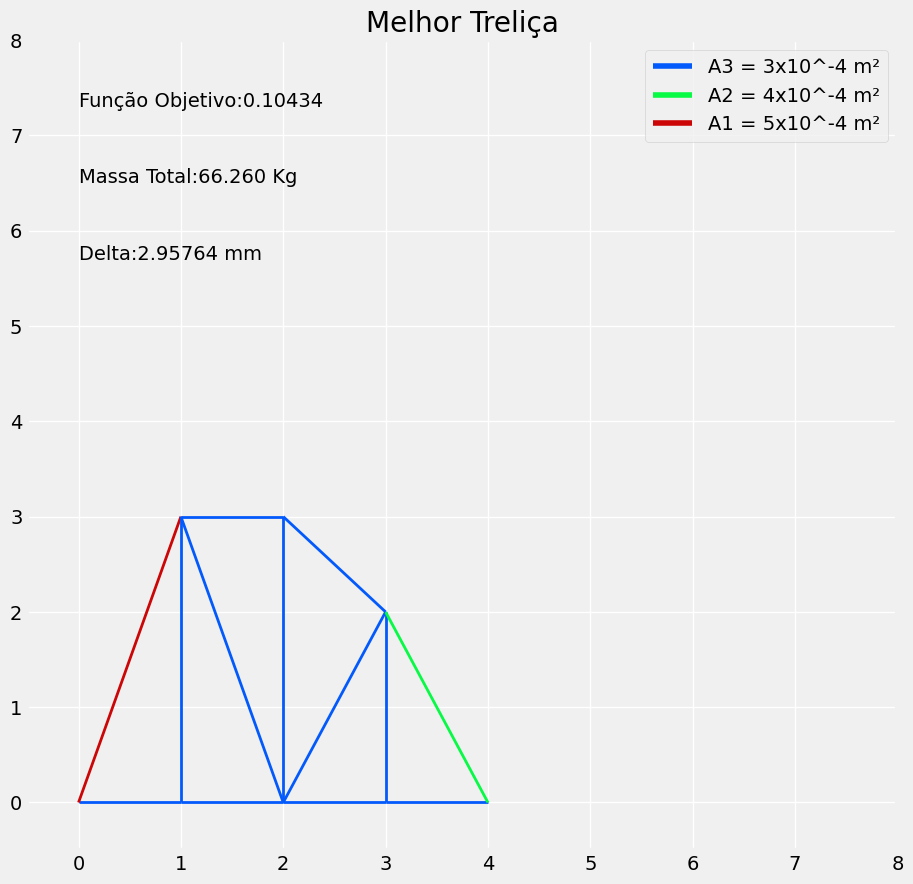

In [14]:
print('Comprimentos:',trelica.melhor_individuo[0])
print('Forças:',trelica.melhor_individuo[1])
print('Áreas:',trelica.melhor_individuo[2])
print(funcao_objetivo(trelica.melhor_individuo[0], trelica.melhor_individuo[1], trelica.melhor_individuo[2]))

l = comprimentos(trelica.melhor_individuo[0])
f = trelica.melhor_individuo[1]
area = trelica.melhor_individuo[2]

delta = fitness(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)
m = massa(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)
fo = funcao_objetivo(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)
forcas = ForcasNormais(comprimentos(trelica.melhor_individuo[0]), trelica.melhor_individuo[1])
t = tensoes(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)

print('Massa:', m)
print('Delta:', delta)
print("Forcas", forcas)
print("tensões:", t)

plotar(l, f, area, delta, m, fo)



Comprimentos: [1, 1, 1, 1, 3.1622776601683795, 3, 3.1622776601683795, 3, 2.23606797749979, 2, 2.23606797749979, 1.0, 1.4142135623730951]
Forças Aplicadas: [0, 70, 10, 40, 10]
Áreas: [0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.0005, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.0005, 0.0004, 0.0004]
Função Objetivo 0.10361619385734845
Massa: 69.9199284291093
Delta: 2.659008248450621
Forcas Axiais nas barras [22.5, 22.5, 26.249999999999996, 26.249999999999996, -71.15124735378853, 0, -2.6352313834736494, 11.666666666666666, -10.248644896874035, 0, -58.69678440936948, -21.666666666666668, -30.64129385141706]
Tensões Axiais nas barras: [75.0, 75.0, 87.49999999999999, 87.49999999999999, -142.30249470757707, 0.0, -8.78410461157883, 38.888888888888886, -34.16214965624678, 0.0, -117.39356881873896, -54.166666666666664, -76.60323462854265]




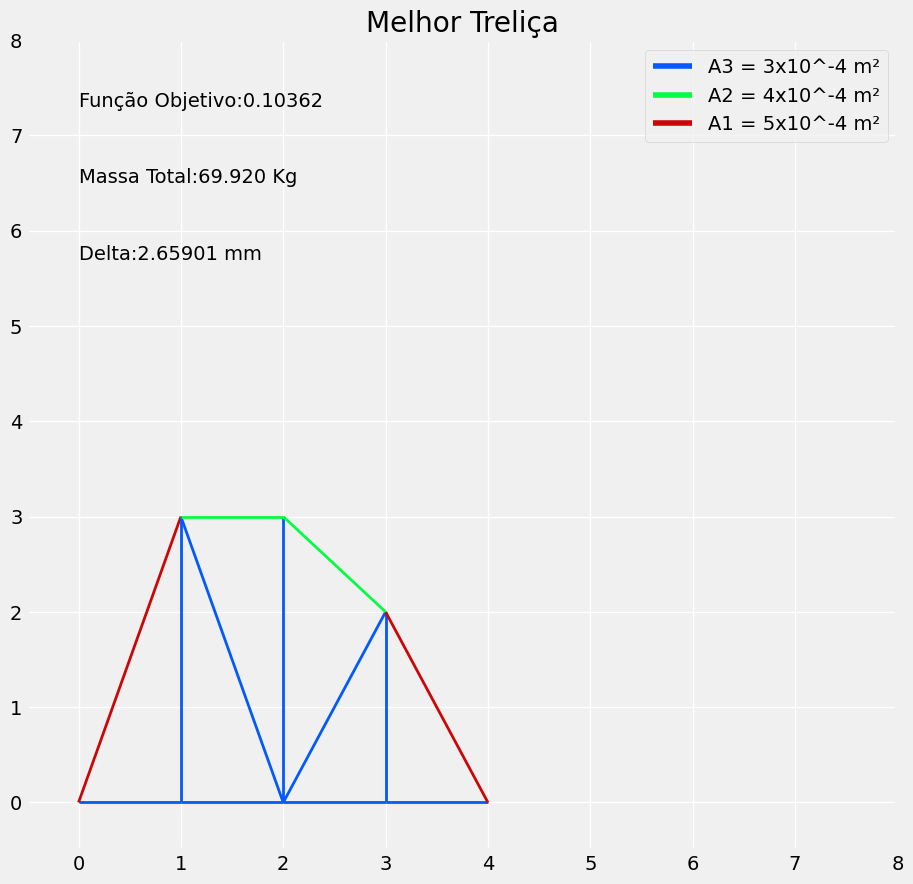

In [15]:
area = [0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.0005, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.00030000000000000003, 0.0005 , 0.0004, 0.0004]

print('\n')
print('Comprimentos:', comprimentos(trelica.melhor_individuo[0]))
print('Forças Aplicadas:',trelica.melhor_individuo[1])
print('Áreas:', area)
print('Função Objetivo',funcao_objetivo(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area))

l = comprimentos(trelica.melhor_individuo[0])
f = trelica.melhor_individuo[1]

delta = fitness(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)
m = massa(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)
fo = funcao_objetivo(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)
forcas = ForcasNormais(comprimentos(trelica.melhor_individuo[0]), trelica.melhor_individuo[1])
t = tensoes(trelica.melhor_individuo[0], trelica.melhor_individuo[1], area)

print('Massa:', m)
print('Delta:', delta)
print("Forcas Axiais nas barras", forcas)
print("Tensões Axiais nas barras:", t)
print('\n')

plotar(l, f, area, delta, m, fo)